# Integrable Kraus Map

In [20]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import Operator, Statevector
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm
from math import ceil

from quantum_circuits import integrable_circuit, nonintegrable_circuit
from utils import numberToBase
from spectrum import complex_spacing_ratio

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=4)

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

path1 = "../../../data/"
path2 = "data/"


## Integrable Unitary

In [23]:
np.random.seed(42)
random.seed(42)

n = 1
d = 2**n
logr = 1
r = 2**logr

dim = n + logr
reps = 2

csr_list = []
for _ in tqdm(range(reps)):
    circuit_main = integrable_circuit(dim, 1)
    print(circuit_main)

    state_list = []
    for j in range(d):
        binary = numberToBase(j, 2, dim)
        circuit_initial = qk.QuantumCircuit(dim)
        for i, q in enumerate(binary):
            if q:
                circuit_initial.x(i)


        circuit = circuit_initial.compose(circuit_main)
        state = Statevector.from_instruction(circuit).data
        state_list.append(state)

    state = np.array(state_list).T

    K_list = []
    for i in range(r):
        K = state[i*2**n:(i+1)*2**n, :]
        K_list.append(K)

    superoperator = np.zeros((d**2, d**2), dtype=complex)
    for K in K_list:
        superoperator += np.kron(K, K.conj())

    spectrum = np.linalg.eigvals(superoperator)[1:]

    spectrum = spectrum.reshape(-1,1)
    csr = complex_spacing_ratio(spectrum)
    csr_list.append(csr)
    

  0%|          | 0/2 [00:00<?, ?it/s]

     ┌──────────────┐┌──────────────────┐ ┌────────────┐
q_0: ┤ Rz(-0.78829) ├┤0                 ├─┤ Rz(1.4577) ├
     └┬────────────┬┘│  (XX+YY)(-π/2,0) │┌┴────────────┤
q_1: ─┤ Rz(2.8319) ├─┤1                 ├┤ Rz(0.61989) ├
      └────────────┘ └──────────────────┘└─────────────┘
     ┌─────────────┐┌──────────────────┐┌─────────────┐
q_0: ┤ Rz(-2.1613) ├┤0                 ├┤ Rz(-2.7766) ├
     ├─────────────┤│  (XX+YY)(-π/2,0) │└┬────────────┤
q_1: ┤ Rz(-2.1615) ├┤1                 ├─┤ Rz(2.3008) ├
     └─────────────┘└──────────────────┘ └────────────┘


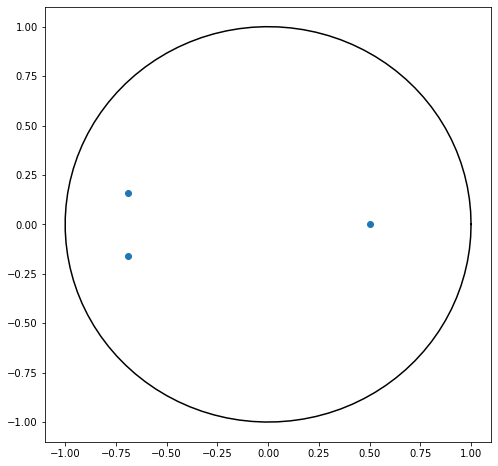

In [24]:
t = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j*t)
#aspect ratio 1
plt.figure(figsize=(8,8))
plt.plot(circle.real, circle.imag, "k")
plt.plot(np.real(spectrum), np.imag(spectrum), 'o')
plt.show()

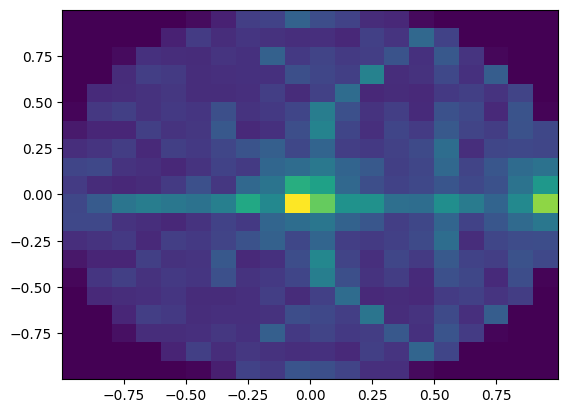

In [229]:
csr = np.concatenate(csr_list)
plt.hist2d(csr.real, csr.imag, bins=20)
plt.show()

In [8]:
np.random.seed(42)
random.seed(42)

n = 7
d = 2**n
logr = 1
r = 2**logr

dim = n + logr
reps = 1

csr_list = []
for _ in tqdm(range(reps)):
    circuit_main = integrable_circuit(dim, dim)

    state_list = []
    for j in range(d):
        binary = numberToBase(j, 2, dim)
        circuit_initial = qk.QuantumCircuit(dim)
        for i, q in enumerate(binary):
            if q:
                circuit_initial.x(i)


        circuit = circuit_initial.compose(circuit_main)
        state = Statevector.from_instruction(circuit).data
        state_list.append(state)

    state = np.array(state_list).T

    K_list = []
    for i in range(r):
        K = state[i*2**n:(i+1)*2**n, :]
        K_list.append(K)

    superoperator = np.zeros((d**2, d**2), dtype=complex)
    for K in tqdm(K_list):
        superoperator += np.kron(K, K.conj())

    print("ost")
    spectrum = np.linalg.eigvals(superoperator)[1:]
    print("ost")
    spectrum = spectrum.reshape(-1,1)
    csr = complex_spacing_ratio(spectrum, verbose=True)
    csr_list.append(csr)
    

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

ost
ost


  0%|          | 0/16383 [00:00<?, ?it/s]

c:\Users\krist\Documents\ModelNISQ\notebooks\nisq_spectrum\integrability\../../../src_tf\spectrum.py:91: RuntimeWarning: invalid value encountered in cdouble_scalars
  z = (spectrum[idx_NN] - spectrum[i]) / (spectrum[idx_NNN] - spectrum[i])
c:\Users\krist\Documents\ModelNISQ\notebooks\nisq_spectrum\integrability\../../../src_tf\spectrum.py:91: RuntimeWarning: divide by zero encountered in cdouble_scalars
  z = (spectrum[idx_NN] - spectrum[i]) / (spectrum[idx_NNN] - spectrum[i])


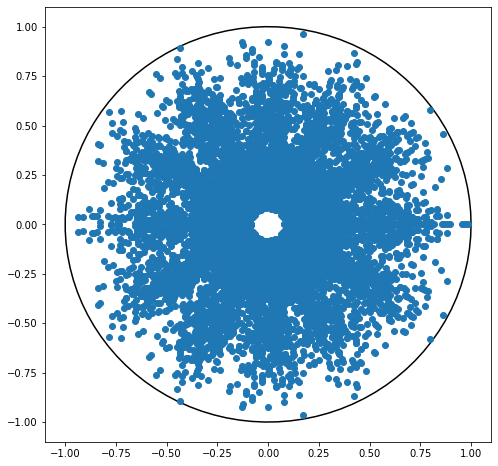

In [9]:
t = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j*t)
#aspect ratio 1
plt.figure(figsize=(8,8))
plt.plot(circle.real, circle.imag, "k")
plt.plot(np.real(spectrum), np.imag(spectrum), 'o')
plt.show()

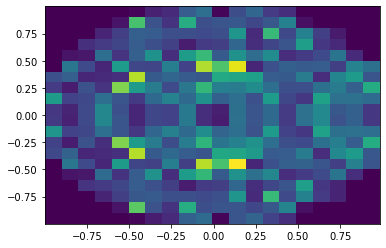

In [18]:
csr = np.concatenate(csr_list)
csr_remove = csr[np.abs(csr.imag) > 10**-6]
plt.hist2d(csr_remove.real, csr_remove.imag, bins=20)
plt.show()

In [9]:
np.random.seed(42)
random.seed(42)

n = 7
d = 2**n
logr = 1
r = 2**logr

dim = n + logr
reps = 1

csr_list = []
for _ in tqdm(range(reps)):
    circuit_main = integrable_circuit(dim, dim)

    state_list = []
    for j in range(d):
        binary = numberToBase(j, 2, dim)
        circuit_initial = qk.QuantumCircuit(dim)
        for i, q in enumerate(binary):
            if q:
                circuit_initial.x(i)


        circuit = circuit_initial.compose(circuit_main)
        state = Statevector.from_instruction(circuit).data
        state_list.append(state)

    state = np.array(state_list).T

    K_list = []
    for i in range(r):
        K = state[i*2**n:(i+1)*2**n, :]
        K_list.append(K)

    superoperator = np.zeros((d**2, d**2), dtype=complex)
    for K in K_list:
        superoperator += np.kron(K, K.conj())

    spectrum = np.linalg.eigvals(superoperator)[1:]

    spectrum = spectrum.reshape(-1,1)
    csr = complex_spacing_ratio(spectrum, verbose=True)
    csr_list.append(csr)
    

  0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
t = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j*t)
#aspect ratio 1
plt.figure(figsize=(8,8))
plt.plot(circle.real, circle.imag, "k")
plt.plot(np.real(spectrum), np.imag(spectrum), 'o')
plt.show()

In [ ]:
csr = np.concatenate(csr_list)
plt.hist2d(csr.real, csr.imag, bins=20)
plt.show()

## Non-Integrable Unitary

In [3]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 5
d = 2**n
logr = 1
r = 2**logr

dim = n + logr
reps = 40

csr_list = []
for _ in tqdm(range(reps)):
    circuit_main = nonintegrable_circuit(dim, dim)

    state_list = []
    for j in range(d):
        binary = numberToBase(j, 2, dim)
        circuit_initial = qk.QuantumCircuit(dim)
        for i, q in enumerate(binary):
            if q:
                circuit_initial.x(i)


        circuit = circuit_initial.compose(circuit_main)
        state = Statevector.from_instruction(circuit).data
        state_list.append(state)

    state = np.array(state_list).T

    K_list = []
    for i in range(r):
        K = state[i*2**n:(i+1)*2**n, :]
        K_list.append(K)

    superoperator = np.zeros((d**2, d**2), dtype=complex)
    for K in K_list:
        superoperator += np.kron(K, K.conj())

    spectrum = np.linalg.eigvals(superoperator)[1:]

    spectrum = spectrum.reshape(-1,1)
    csr = complex_spacing_ratio(spectrum)
    csr_list.append(csr)
    

NameError: name 'tf' is not defined

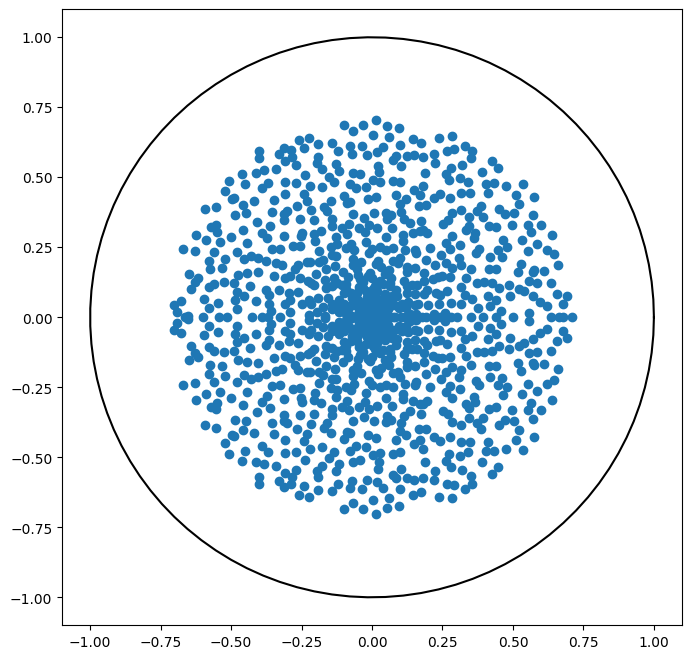

In [231]:
t = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j*t)
#aspect ratio 1
plt.figure(figsize=(8,8))
plt.plot(circle.real, circle.imag, "k")
plt.plot(np.real(spectrum), np.imag(spectrum), 'o')
plt.show()

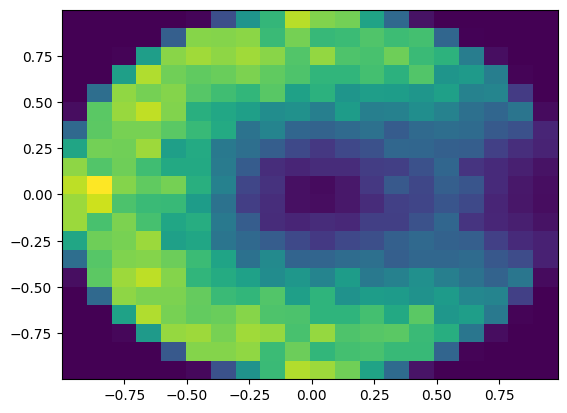

In [232]:
csr = np.concatenate(csr_list)
plt.hist2d(csr.real, csr.imag, bins=20)
plt.show()

In [236]:
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

n = 5
d = 2**n
logr = 2
r = 2**logr

dim = n + logr
reps = 40

csr_list = []
for _ in tqdm(range(reps)):
    circuit_main = nonintegrable_circuit(dim, dim)

    state_list = []
    for j in range(d):
        binary = numberToBase(j, 2, dim)
        circuit_initial = qk.QuantumCircuit(dim)
        for i, q in enumerate(binary):
            if q:
                circuit_initial.x(i)


        circuit = circuit_initial.compose(circuit_main)
        state = Statevector.from_instruction(circuit).data
        state_list.append(state)

    state = np.array(state_list).T

    K_list = []
    for i in range(r):
        K = state[i*2**n:(i+1)*2**n, :]
        K_list.append(K)

    superoperator = np.zeros((d**2, d**2), dtype=complex)
    for K in K_list:
        superoperator += np.kron(K, K.conj())

    spectrum = np.linalg.eigvals(superoperator)[1:]

    spectrum = spectrum.reshape(-1,1)
    csr = complex_spacing_ratio(spectrum)
    csr_list.append(csr)
    

  0%|          | 0/40 [00:00<?, ?it/s]

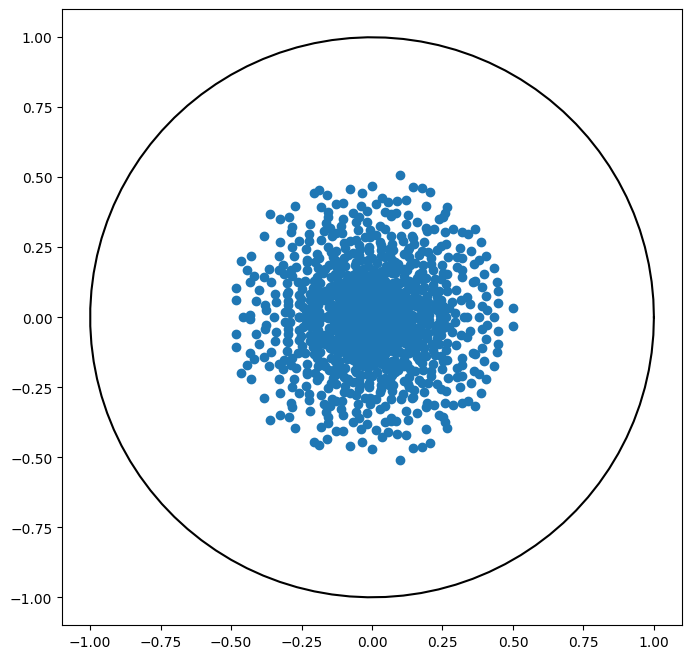

In [237]:
t = np.linspace(0, 2*np.pi, 100)
circle = np.exp(1j*t)
#aspect ratio 1
plt.figure(figsize=(8,8))
plt.plot(circle.real, circle.imag, "k")
plt.plot(np.real(spectrum), np.imag(spectrum), 'o')
plt.show()

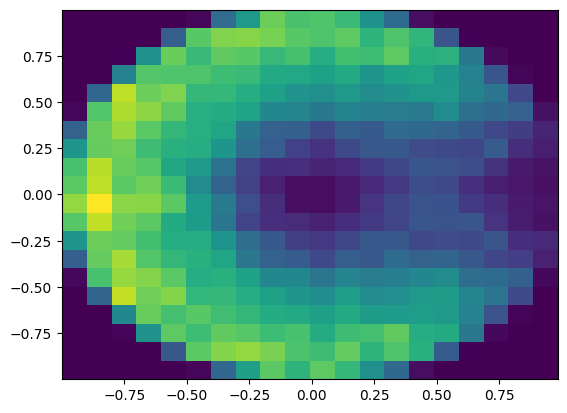

In [238]:
csr = np.concatenate(csr_list)
plt.hist2d(csr.real, csr.imag, bins=20)
plt.show()